In [41]:
import numpy as np
import os
import matplotlib.pyplot as plt
from common import Reward, Action
from icecream import ic

In [42]:
output_dir = "output/20250812-16-41-alignment"

# config
T = 40000
trials = [6]
algs = ["TS-ep"]
K = 32

num_trials = len(trials)
num_algs = len(algs)
K = 32
K_env = K // 2

all_regrets = np.zeros((num_trials, num_algs, T), dtype=Reward)
all_actions = np.zeros((num_trials, num_algs, T), dtype=Action)

for i, trial_num in enumerate(trials):
    seed = 30 + trial_num
    for alg in algs:
        filename = f"{trial_num}_{alg}_seed{seed}.npy"
        with open(os.path.join(output_dir, f"regrets_{filename}"), "rb") as f:
            all_regrets[i] = np.load(f)
        with open(os.path.join(output_dir, f"actions_{filename}"), "rb") as f:
            all_actions[i] = np.load(f)

In [43]:
selected_alg = 0

regrets_IDS = all_regrets[:, selected_alg, :]
actions_IDS = all_actions[:, selected_alg, :]

In [44]:
env_actions = (actions_IDS < 16).astype(int)
human_actions = 1 - env_actions

cum_env_actions = np.cumsum(env_actions, axis=1)
cum_human_actions = np.cumsum(human_actions, axis=1)

In [45]:
ic(actions_IDS)
ic(human_actions)
ic(cum_human_actions)

ic| actions_IDS: array([[0, 1, 2, ..., 5, 5, 5]], shape=(1, 40000), dtype=uint8)
ic| human_actions: array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 40000))
ic| cum_human_actions: array([[   0,    0,    0, ..., 2279, 2279, 2279]], shape=(1, 40000))


array([[   0,    0,    0, ..., 2279, 2279, 2279]], shape=(1, 40000))

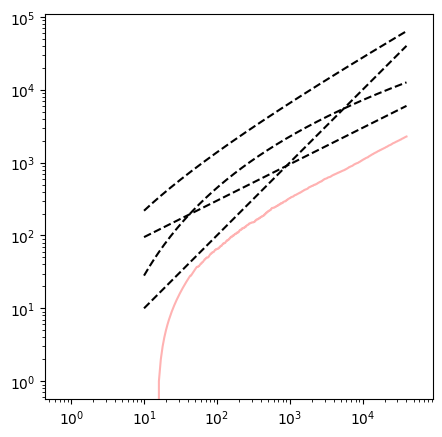

In [52]:
plt.figure(figsize=(5, 5))
for i in range(len(all_actions)):
    # plt.plot(np.arange(1, len(actions)+1), cum_env_actions[i], color='blue', alpha=0.3)
    plt.plot(np.arange(T), cum_human_actions[i], color="red", alpha=0.3)
    ...

# min_t = len(all_actions[0])

# plt.plot(np.arange(10, min_t, 1), np.mean(cum_human_actions, axis=0)[10:])
# plt.fill_between(np.arange(10, min_t, 1), np.mean(cum_human_actions, axis=0)[10:] + np.std(cum_human_actions, axis=0)[10:], np.mean(cum_human_actions, axis=0)[10:] - np.std(cum_human_actions, axis=0)[10:], alpha=0.3)

sqrt_t = np.sqrt(np.arange(10, T, 1))
sqrt_t_log_t = np.sqrt(np.arange(10, T, 1)) * np.log(np.arange(10, T, 1))
log_t = np.log(np.arange(10, T, 1)) * np.log(np.arange(10, T, 1))

plt.plot(np.arange(10, T, 1), np.arange(10, T, 1), color="black", linestyle="--")
plt.plot(np.arange(10, T, 1), 30 * sqrt_t_log_t, color="black", linestyle="--")
plt.plot(np.arange(10, T, 1), log_t**2, color="black", linestyle="--")
plt.plot(np.arange(10, T, 1), 30 * sqrt_t, color="black", linestyle="--")

plt.xscale("log")
plt.yscale("log")
plt.axis("equal")
plt.show()

In [49]:
actions = actions_IDS[0]

In [50]:
unique, counts = np.unique(actions, return_counts=True)

for i in range(16):
    ic(f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}")

n_h = sum(counts[16:])
n_env = sum(counts[:16])
ic(n_h)
ic(f"proportion: {n_h / (n_h + n_env)}")

ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '0: 5		 0h: 7'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '1: 6		 1h: 3'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '2: 14		 2h: 2'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '3: 12		 3h: 11'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '4: 6		 4h: 3'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '5: 35566		 5h: 1763'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '6: 6		 6h: 6'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '7: 185		 7h: 43'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '8: 5		 8h: 5'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '9: 10		 9h: 3'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '10: 31		 10h: 14'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '11: 7		 11h: 4'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '12: 12		 12h: 3'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i + 16]}": '13: 16		 13h: 6'
ic| f"{i}: {counts[i]}\t\t {i}h: {co

'proportion: 0.056975'

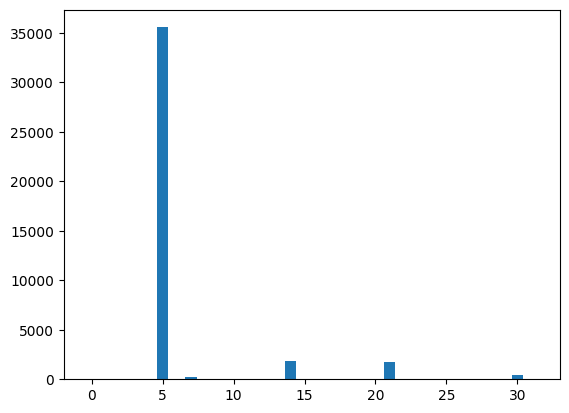

In [51]:
plt.bar(unique, counts)
plt.show()